In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [70]:
df.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [71]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [72]:
df.isna().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [73]:
df_cleaned = df.drop(['Order ID','Customer Name','State'],axis=1)
df_cleaned.dtypes

Category         object
Sub Category     object
City             object
Order Date       object
Region           object
Sales             int64
Discount        float64
Profit          float64
dtype: object

In [74]:
for col in df_cleaned:
    print(df_cleaned[col].unique())

['Oil & Masala' 'Beverages' 'Food Grains' 'Fruits & Veggies' 'Bakery'
 'Snacks' 'Eggs, Meat & Fish']
['Masalas' 'Health Drinks' 'Atta & Flour' 'Fresh Vegetables'
 'Organic Staples' 'Fresh Fruits' 'Biscuits' 'Cakes' 'Chocolates' 'Eggs'
 'Cookies' 'Chicken' 'Edible Oil & Ghee' 'Mutton' 'Soft Drinks'
 'Dals & Pulses' 'Organic Vegetables' 'Noodles' 'Organic Fruits' 'Fish'
 'Spices' 'Rice' 'Breads & Buns']
['Vellore' 'Krishnagiri' 'Perambalur' 'Dharmapuri' 'Ooty' 'Trichy'
 'Ramanadhapuram' 'Tirunelveli' 'Chennai' 'Karur' 'Namakkal' 'Dindigul'
 'Kanyakumari' 'Bodi' 'Tenkasi' 'Viluppuram' 'Madurai' 'Salem' 'Cumbum'
 'Nagercoil' 'Pudukottai' 'Theni' 'Coimbatore' 'Virudhunagar']
['11-08-2017' '06-12-2017' '10-11-2016' ... '3/16/2015' '8/29/2016'
 '04-06-2017']
['North' 'South' 'West' 'Central' 'East']
[1254  749 2360 ... 1679 1582 1162]
[0.12 0.18 0.21 0.25 0.26 0.33 0.32 0.23 0.27 0.13 0.1  0.19 0.22 0.11
 0.28 0.35 0.29 0.34 0.17 0.24 0.16 0.2  0.31 0.3  0.15 0.14]
[401.28 149.8  165.2  ... 4

In [75]:
df_cleaned
df2_masala = df_cleaned.loc[df_cleaned['Sub Category'] == 'Masalas']
df2 = df2_masala[['Sales','Order Date']]
df2['Order Date'] = df2['Order Date'].str.replace('/','-')
df2_grouped = df2.groupby(['Order Date']).sum()
df2_grouped

C:\Users\ruwin\AppData\Local\Temp\ipykernel_13216\1774247255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Order Date'] = df2['Order Date'].str.replace('/','-')


,Sales
Order Date,
01-01-2018,1353
01-02-2017,1152
01-02-2018,1846
01-03-2016,2419
01-06-2015,3372
...,...
9-24-2018,2281
9-25-2016,1588
9-25-2017,1137


In [ ]:
import xgboost



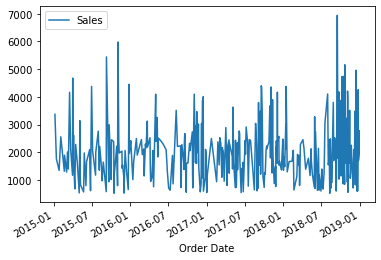

In [76]:
df2_grouped.index = pd.to_datetime(df2_grouped.index,format="%m-%d-%Y", errors='coerce', dayfirst=True)
df2_grouped.plot()
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

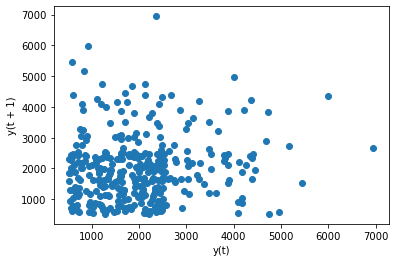

In [77]:
from pandas.plotting import lag_plot
lag_plot(df2_grouped)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

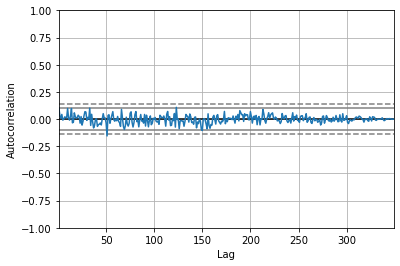

In [78]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df2_grouped)

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

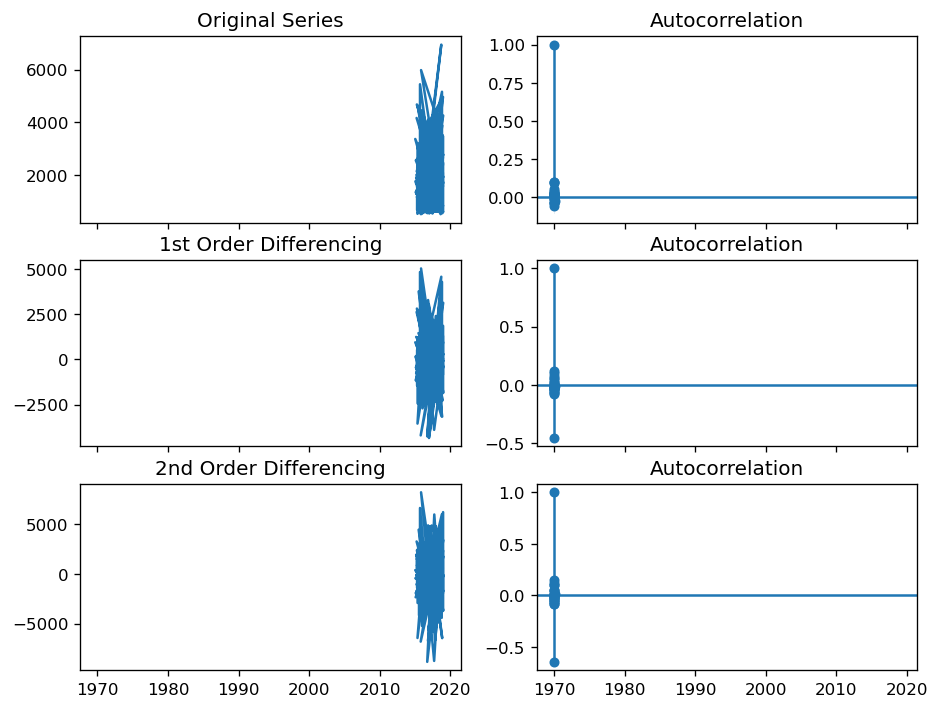

In [86]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df2_grouped.Sales); axes[0, 0].set_title('Original Series')
plot_acf(df2_grouped.Sales, ax=axes[0, 1])


# 1st Differencing
axes[1, 0].plot(df2_grouped.Sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df2_grouped.Sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df2_grouped.Sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df2_grouped.Sales.diff().diff().dropna(), ax=axes[2, 1])

plt.show()




In [87]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df2_grouped.Sales, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

c:\Users\ruwin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\ruwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

AttributeError: 'pandas._libs.properties.CachedProperty' object has no attribute 'func'